<a href="https://colab.research.google.com/github/pritam-dante/machineLearning/blob/main/Projects/minor/minorProjectFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install plotly

In [3]:

import plotly.express as px


In [4]:
df = pd.read_csv('data.csv')

In [6]:
df.sample(3)

Age Sex ChestPainType  ...  Oldpeak  ST_Slope  HeartDisease
206   35   M           ATA  ...      0.0        Up             0
425   60   M           ATA  ...      0.5      Flat             1
851   53   F           ASY  ...      0.0        Up             0

[3 rows x 12 columns]

## Attribute Information:
1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: exercise relative to rest = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Using this info() method we can check the information about this data. It tell us the Null count and Dtype of this data.



In [8]:
df.describe().T

count        mean         std   min     25%    50%    75%    max
Age           918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP     918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol   918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
FastingBS     918.0    0.233115    0.423046   0.0    0.00    0.0    0.0    1.0
MaxHR         918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak       918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2
HeartDisease  918.0    0.553377    0.497414   0.0    0.00    1.0    1.0    1.0

## The describe() function describes about the data, and also calculates the mean, count, std, min of the our dataset.

In [9]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## The isnull().sum() depicts the null value in our dataset. If there is any null value the numbers will be automatically shown below.

**Here we will find out the categorical and numerical values in our dataset.**

In [10]:
categoricalCol = df.select_dtypes(object).columns
numericalCol = df.select_dtypes(exclude=object).columns

print("cat Columns", categoricalCol)
print("num Columns", numericalCol)

cat Columns Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')
num Columns Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')


### Let's check for any data imbalance

In [11]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

**EDA**

In [12]:
df[categoricalCol].nunique()

Sex               2
ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64

In [13]:
df[categoricalCol].describe().T

count unique     top freq
Sex              918      2       M  725
ChestPainType    918      4     ASY  496
RestingECG       918      3  Normal  552
ExerciseAngina   918      2       N  547
ST_Slope         918      3    Flat  460

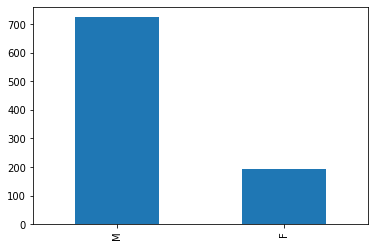

In [14]:
df['Sex'].value_counts().plot(kind = 'bar')

In [15]:
px.bar(df['Sex'].value_counts(),width=600,height=500)

In [16]:
fig = px.pie(df,names='Sex',height=400,width=600, labels = {'M':'Male','F':'Female'},title='Count of Gender')
fig.show()

In [17]:
df.pivot_table('HeartDisease',index = 'Sex')*100

HeartDisease
Sex              
F       25.906736
M       63.172414

**Average of People with Heart Disease based on their Gender. we can see that most of the males on our datasets have Heart Disease.**

In [19]:
age_range = pd.cut(df['Age'], 5)
df.groupby(age_range)['HeartDisease'].mean()

Age
(27.951, 37.8]    0.265306
(37.8, 47.6]      0.378947
(47.6, 57.4]      0.535817
(57.4, 67.2]      0.717391
(67.2, 77.0]      0.703704
Name: HeartDisease, dtype: float64

In [20]:
np.round(df.pivot_table('HeartDisease',index='Sex',columns=age_range)*100,2)

Age  (27.951, 37.8]  (37.8, 47.6]  (47.6, 57.4]  (57.4, 67.2]  (67.2, 77.0]
Sex                                                                        
F              7.69         13.95         22.08         48.08         12.50
M             33.33         44.90         62.50         77.23         80.43

**As seen from the above table that females from 57-67 years has high average of Heart Disease while Males from 47 to above mostly have High Disease.**

In [21]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [22]:
df.groupby('ChestPainType').sum()

Age  RestingBP  Cholesterol  ...  MaxHR  Oldpeak  HeartDisease
ChestPainType                                 ...                              
ASY            27260      66082        92576  ...  63725    576.7           392
ATA             8519      22598        40317  ...  25986     53.2            24
NAP            10822      26585        40080  ...  29077    137.0            72
TA              2522       6275         9525  ...   6803     47.7            20

[4 rows x 7 columns]

In [23]:
df.groupby('ChestPainType')['HeartDisease'].sum()

ChestPainType
ASY    392
ATA     24
NAP     72
TA      20
Name: HeartDisease, dtype: int64

In [24]:
df.groupby('ChestPainType')['HeartDisease'].mean()*100

ChestPainType
ASY    79.032258
ATA    13.872832
NAP    35.467980
TA     43.478261
Name: HeartDisease, dtype: float64

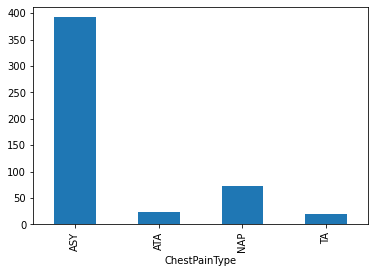

In [25]:
df.groupby('ChestPainType')['HeartDisease'].sum().plot(kind = 'bar')

**We can see that people with ASY ChestPaintType are more likely to have Heart Disease than others. Let's check and see if this holds True based on individual Sex.**

In [26]:
df.pivot_table('HeartDisease',index='Sex',columns='ChestPainType',aggfunc='sum')

ChestPainType  ASY  ATA  NAP  TA
Sex                             
F               39    4    6   1
M              353   20   66  19

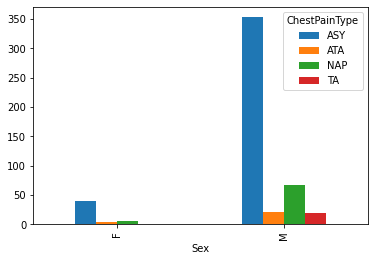

In [27]:
(df.pivot_table('HeartDisease',index='Sex',columns='ChestPainType',aggfunc='sum')).plot(kind='bar')

In [28]:
px.scatter(df.pivot_table('HeartDisease',index='Sex',columns='ChestPainType',aggfunc='sum'))

**Interesting! No matter what the Gender is, People With ASY ChestPaintType are more likely to have Heart Disease.**

In [29]:
df.groupby('RestingECG')['HeartDisease'].mean()*100

RestingECG
LVH       56.382979
Normal    51.630435
ST        65.730337
Name: HeartDisease, dtype: float64

In [30]:
px.bar(df.groupby('RestingECG')['HeartDisease'].mean()*100)

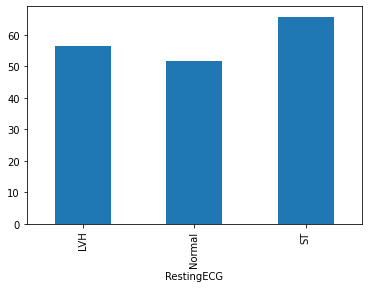

In [31]:
(df.groupby('RestingECG')['HeartDisease'].mean()*100).plot(kind='bar')

**The RestingECG Seems to balance for both LHV and Normal expect for ST which has about 65% Individuals having HeartDisease.**

In [32]:
df.pivot_table('HeartDisease',index='Sex',columns='RestingECG',aggfunc='sum')

RestingECG  LVH  Normal   ST
Sex                         
F            14      29    7
M            92     256  110

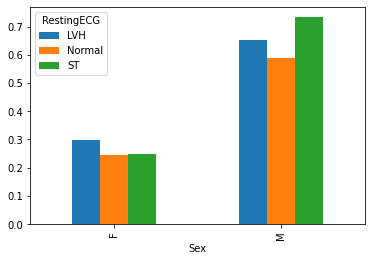

In [33]:
(df.pivot_table('HeartDisease',index='Sex',columns='RestingECG',aggfunc='mean')).plot(kind='bar')

In [34]:
df.groupby('ExerciseAngina')['HeartDisease'].mean()*100

ExerciseAngina
N    35.100548
Y    85.175202
Name: HeartDisease, dtype: float64

**Again 85% of People with ExerciseAngina have HeartDisease**



In [35]:
(df.pivot_table('HeartDisease', index='Sex', columns='ExerciseAngina')*100).round(2)

ExerciseAngina      N      Y
Sex                         
F               15.33  62.79
M               42.57  88.11

In [36]:
(df.groupby('ST_Slope')['HeartDisease'].mean() * 100).round(2)

ST_Slope
Down    77.78
Flat    82.83
Up      19.75
Name: HeartDisease, dtype: float64

**People with Up ST_Slope have lower rate of HeartDisease than others.**



In [37]:
(df.pivot_table('HeartDisease', index='Sex', columns='ST_Slope')*100).round(2)

ST_Slope   Down   Flat     Up
Sex                          
F         71.43  52.00   5.41
M         78.57  88.83  25.35

**Numerical Columns**

In [38]:
numericalCol

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')

In [39]:
df[numericalCol].describe().T

count        mean         std   min     25%    50%    75%    max
Age           918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP     918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol   918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
FastingBS     918.0    0.233115    0.423046   0.0    0.00    0.0    0.0    1.0
MaxHR         918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak       918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2
HeartDisease  918.0    0.553377    0.497414   0.0    0.00    1.0    1.0    1.0

In [40]:
px.scatter(df, x='MaxHR',y='Age',color='HeartDisease',trendline='ols',title='Effect of Heart Rate and Age on Diseases')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



**People with Higher age group having Low Heart rate are more prone to Heart Diseases**

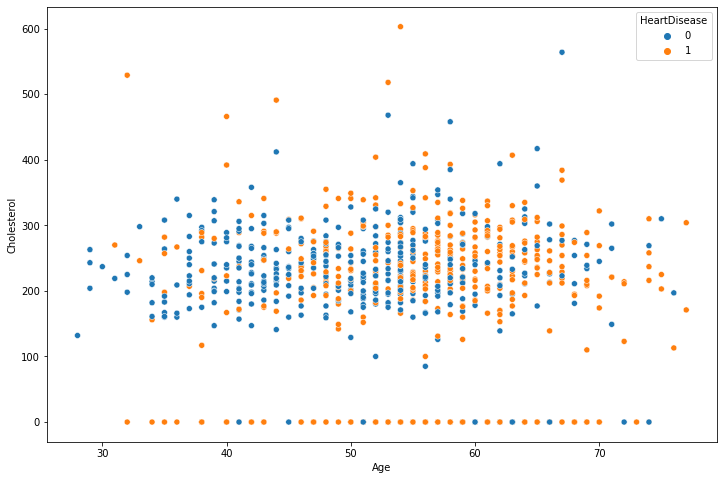

In [41]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x='Age',y='Cholesterol',hue='HeartDisease')

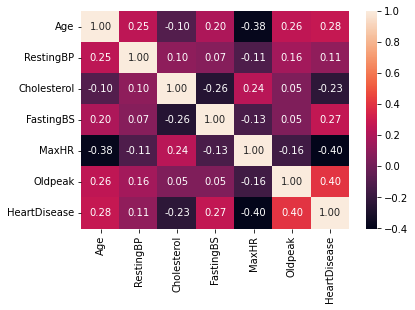

In [42]:
corr = df[numericalCol].corr()
sns.heatmap(corr,annot=True,fmt='.2f')

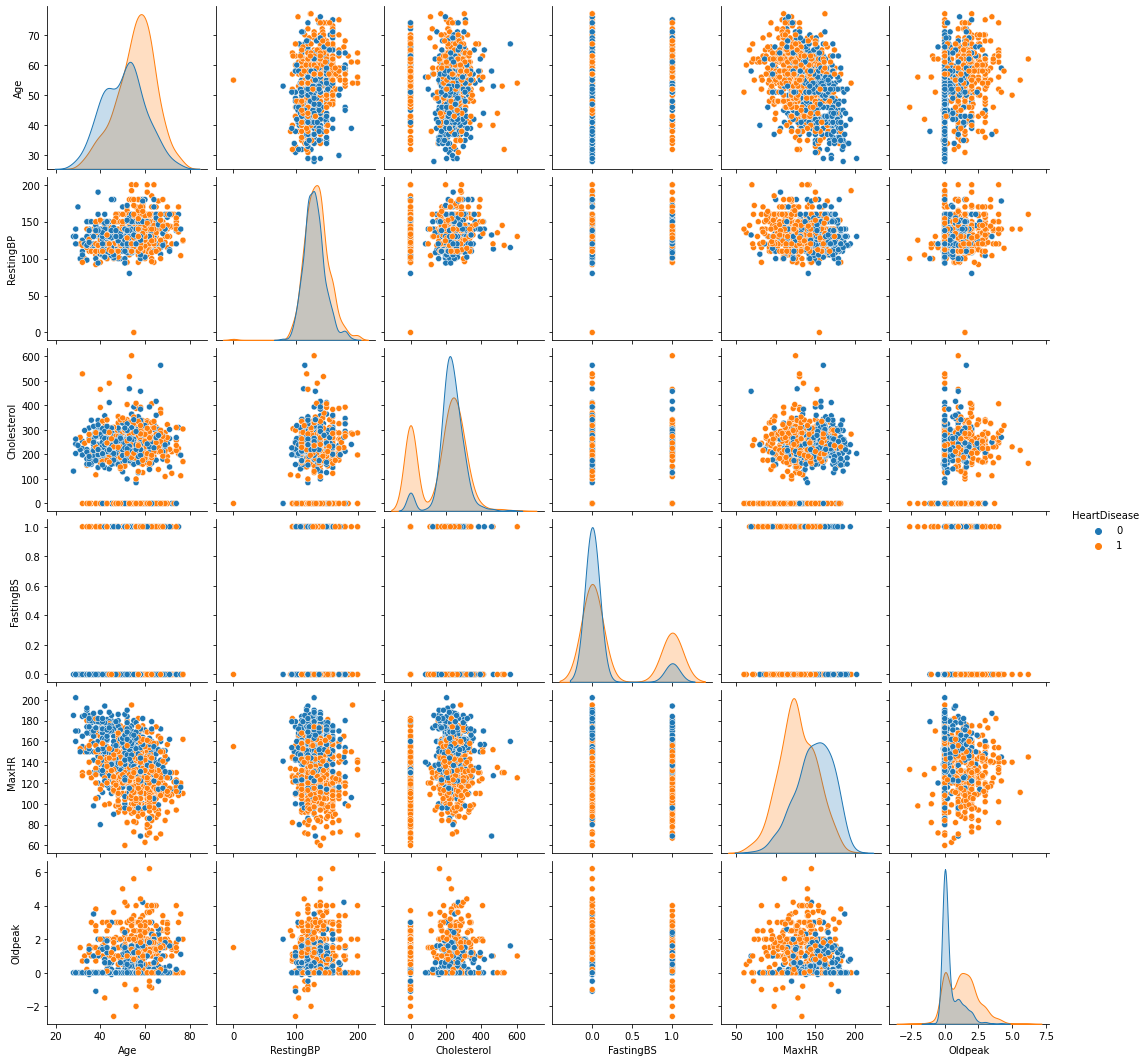

In [43]:
sns.pairplot(df,hue='HeartDisease')

**Conclusion**
>From the above analysis we can see that most of our categorical features has some relationship with our Target Variable. While the numerical features are less more important but nevertheless we are going to include both to our model. and also most of the males in our Dataset have Heart Disease.

**Outliers**
>Using boxplots it's easy and fast to see the outliers as it represents those points clearly on the plot.

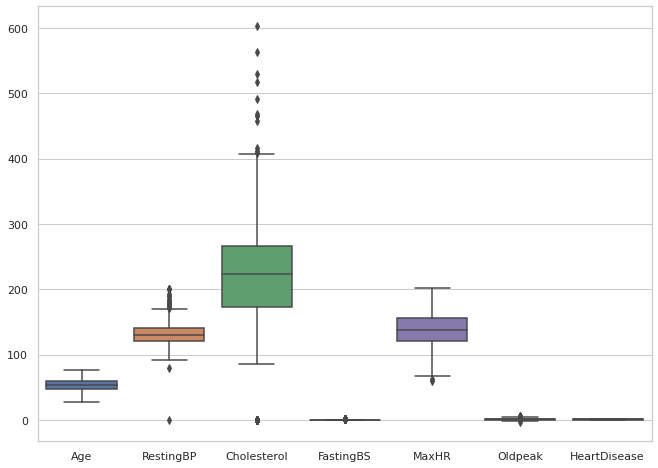

In [47]:
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1, style='whitegrid')
sns.boxplot(data=df)

>With a quick research we can see some values with RestingBP near zero, which is not possible. Also there are some values with Cholesterol near zero which is not possible also. Let's analizy how many of them are and how we can impute) them.

####Here I will replace the RestingBP equal zero with the median as this is more resistant to outliers that the mean

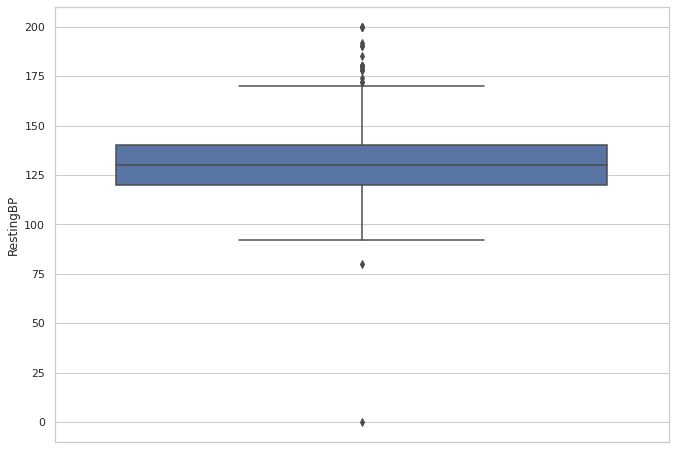

In [48]:
sns.boxplot(data=df,y="RestingBP")

In [49]:
# Let's search the outlier
df[df['RestingBP'] <50]

Age Sex ChestPainType  ...  Oldpeak  ST_Slope  HeartDisease
449   55   M           NAP  ...      1.5      Flat             1

[1 rows x 12 columns]

In [50]:
df.drop(df.index[449],inplace=True)

In [51]:
df[df['RestingBP'] <50]

Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []

>Here we see the entry do not has RestingBP Cholesterol and FastingBS. I will drop it because it is one entry in one thousand. If we had more data to represent we should use a method to imputate the values. Now let's search the values with zero value of Cholesterol.

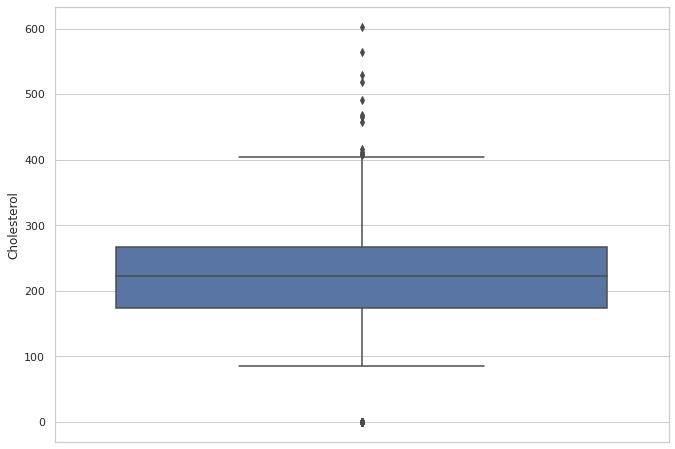

In [52]:
sns.boxplot(data=df,y="Cholesterol")

In [53]:
df[df['Cholesterol'] == 0]

Age Sex ChestPainType  ...  Oldpeak  ST_Slope  HeartDisease
293   65   M           ASY  ...      0.0      Flat             1
294   32   M            TA  ...      0.7        Up             1
295   61   M           ASY  ...      1.5        Up             1
296   50   M           ASY  ...      0.7      Flat             1
297   57   M           ASY  ...      1.4        Up             1
..   ...  ..           ...  ...      ...       ...           ...
514   43   M           ASY  ...      0.5        Up             1
515   63   M           NAP  ...      3.0      Flat             0
518   48   M           NAP  ...      1.0      Down             1
535   56   M           ASY  ...      1.0      Flat             1
536   62   M           NAP  ...      1.2      Flat             1

[171 rows x 12 columns]

###Almost 10% of the dataset has this value missing. Before making assumptions I will see which is the distribution of HeartDisease within these points. Then I will justify a method to impute the values.

In [54]:
df[df["Cholesterol"] ==0]['HeartDisease'].value_counts()

1    151
0     20
Name: HeartDisease, dtype: int64

In [55]:
df[df["Cholesterol"] ==0]['HeartDisease'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

1    88.3%
0    11.7%
Name: HeartDisease, dtype: object

>Here we can see that the 88% of the entries here has a heart disease so this is highly skewed. In order to impute skewed data I will use the median of the values of Cholesterol with heart disease. I will do this because nearly all the entries have heart disease and the median of this values is resistant to outliers.

In [56]:
#This line of code gives me the non zero values of cholesterol with heart disease.
mask = (df['Cholesterol'] !=0) & (df['HeartDisease'] ==1)
df.loc[mask]['Cholesterol'].median()

246.0

**I'll impute with this value**

In [57]:
df.loc[df['Cholesterol'] ==0,"Cholesterol"] = df.loc[mask]['Cholesterol'].median()

>Let's see how the distribution is modified and if the correlation between heart disease and cholesterol has changed

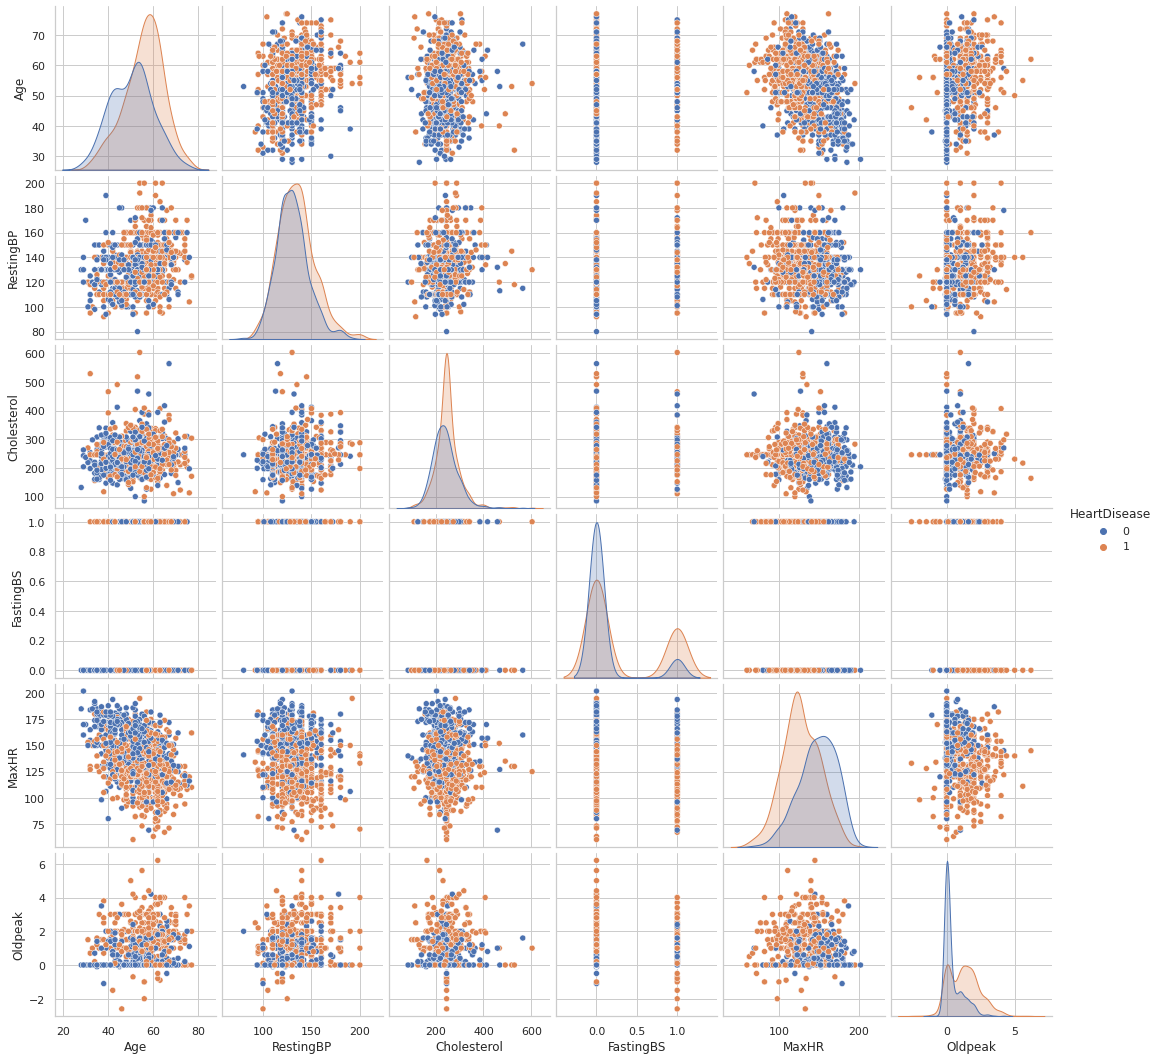

In [58]:
sns.pairplot(data=df,hue='HeartDisease')

>Here we can see that the distribution of Cholesterol has changed and also the correlation. From having a negative correlation with heart disease now it is positive. This makes sense as this is one of the first estimators a doctor uses to suggest further analysis.

In [59]:
df.corr()['Cholesterol']['HeartDisease']

0.09727708167111189

In [60]:
px.scatter(df,x='Age',y='Cholesterol',color='HeartDisease')

**Categorical Columns**

In [61]:
categoricalCol

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [62]:
df[categoricalCol].describe().T

count unique     top freq
Sex              917      2       M  724
ChestPainType    917      4     ASY  496
RestingECG       917      3  Normal  551
ExerciseAngina   917      2       N  546
ST_Slope         917      3    Flat  459

In [63]:
df['Sex'].value_counts()

M    724
F    193
Name: Sex, dtype: int64

In [64]:
df['ChestPainType'].value_counts()

ASY    496
NAP    202
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [65]:
df['RestingECG'].value_counts()

Normal    551
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [66]:
df['ST_Slope'].value_counts()

Flat    459
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [67]:
df['ExerciseAngina'].value_counts()

N    546
Y    371
Name: ExerciseAngina, dtype: int64

In [68]:
#making a copy of the database
df_new = df.copy()

In [69]:
df_new.shape

(917, 12)

In [70]:
df_new.sample(3)

Age Sex ChestPainType  ...  Oldpeak  ST_Slope  HeartDisease
653   42   M           NAP  ...      0.0        Up             0
900   58   M           ASY  ...      4.4      Down             1
289   36   M           ATA  ...      0.0        Up             0

[3 rows x 12 columns]

>Converting the categorical column into codes

In [71]:
df_new[categoricalCol] = df_new[categoricalCol].astype('category')
df_new[categoricalCol] = df_new[categoricalCol].apply(lambda x:x.cat.codes)

In [78]:
df_new[categoricalCol]

Sex  ChestPainType  RestingECG  ExerciseAngina  ST_Slope
0      1              1           1               0         2
1      0              2           1               0         1
2      1              1           2               0         2
3      0              0           1               1         1
4      1              2           1               0         2
..   ...            ...         ...             ...       ...
913    1              3           1               0         1
914    1              0           1               0         1
915    1              0           1               1         1
916    0              1           0               0         1
917    1              2           1               0         2

[917 rows x 5 columns]

In [72]:
print(np.unique(df_new.ChestPainType))

[0 1 2 3]


In [73]:
df_new.sample(3)

Age  Sex  ChestPainType  ...  Oldpeak  ST_Slope  HeartDisease
550   55    1              0  ...      2.0         1             1
702   59    1              3  ...      4.2         0             0
706   61    0              0  ...      0.0         2             1

[3 rows x 12 columns]

In [79]:
df_new2 = df.copy()

In [80]:
df_new2.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [81]:
c= df_new2.Sex.astype('category')
d = dict(enumerate(c.cat.categories))
print(d)

{0: 'F', 1: 'M'}


In [82]:
c= df_new2.ChestPainType.astype('category')
d = dict(enumerate(c.cat.categories))
print(d)

{0: 'ASY', 1: 'ATA', 2: 'NAP', 3: 'TA'}


**Training and Testing Data**

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X = df_new.drop(['HeartDisease'], axis = 1)
y = df_new['HeartDisease']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [85]:
X_train.shape,X_test.shape

((733, 11), (184, 11))

**Importing all the Models**

In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

#predicting without feature selection and standaridization

In [133]:
#metrics for predicting scores
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score,recall_score,precision_score,f1_score

>Logistic Regression

In [116]:
model_logistic = LogisticRegression(max_iter=800)
model_logistic.fit(X_train,y_train)

LogisticRegression(max_iter=800)

In [117]:
predLogistic = model_logistic.predict(X_test)

In [118]:
confusion_matrix(y_test,predLogistic)

array([[62, 20],
       [12, 90]])

In [103]:
accuracyLogistic = accuracy_score(y_test,predLogistic)
accuracyLogistic

0.8260869565217391

In [105]:
recallLogistic = recall_score(y_test,predLogistic)
recallLogistic

0.8823529411764706

In [106]:
precisionLogistic = precision_score(y_test,predLogistic)
precisionLogistic

0.8181818181818182

In [107]:
f1Logistic = f1_score(y_test,predLogistic)
f1Logistic

0.8490566037735848

>Decision Tree Classifier

In [153]:
modelDecision = DecisionTreeClassifier()
modelDecision.fit(X_train,y_train)

DecisionTreeClassifier()

In [154]:
predDecision = modelDecision.predict(X_test)

In [155]:
confusion_matrix(y_test,predDecision)

array([[63, 19],
       [21, 81]])

In [156]:
accuracyDecision = accuracy_score(y_test,predDecision)
accuracyDecision

0.782608695652174

In [157]:
recallDecision = recall_score(y_test,predDecision)
recallDecision

0.7941176470588235

In [158]:
precisionDecision = precision_score(y_test,predDecision)
precisionDecision

0.81

In [159]:
f1Decision = f1_score(y_test,predDecision)
f1Decision

0.801980198019802

>Random Forest

In [160]:
modelRandom = RandomForestClassifier()
modelRandom.fit(X_train,y_train)

RandomForestClassifier()

In [161]:
predRandom = modelRandom.predict(X_test)

In [162]:
confusion_matrix(y_test,predRandom)

array([[60, 22],
       [ 8, 94]])

In [163]:
accuracyRandom = accuracy_score(y_test,predRandom)
accuracyRandom

0.8369565217391305

In [164]:
recallRandom = recall_score(y_test,predRandom)
recallRandom

0.9215686274509803

In [166]:
precisionRandom = precision_score(y_test,predRandom)
precisionRandom

0.8103448275862069

In [167]:
f1Random = f1_score(y_test,predRandom)
f1Random

0.8623853211009175

>Ada Boost Classifier

In [169]:
modelAdaBoost = AdaBoostClassifier()
modelAdaBoost.fit(X_train,y_train)

AdaBoostClassifier()

In [170]:
predAdaBoost = modelAdaBoost.predict(X_test)

In [171]:
confusion_matrix(y_test,predAdaBoost)

array([[63, 19],
       [15, 87]])

In [172]:
accuracyAdaBoost = accuracy_score(y_test,predAdaBoost)
accuracyAdaBoost

0.8152173913043478

In [173]:
recallAdaBoost = recall_score(y_test,predAdaBoost)
recallAdaBoost

0.8529411764705882

In [174]:
precisionAdaBoost = precision_score(y_test,predAdaBoost)
precisionAdaBoost

0.8207547169811321

In [175]:
f1AdaBoost = f1_score(y_test,predAdaBoost)
f1AdaBoost

0.8365384615384616

>Gradient Boosting Classifier

In [176]:
modelGradient = GradientBoostingClassifier()
modelGradient.fit(X_train,y_train)

GradientBoostingClassifier()

In [177]:
predGradient = modelGradient.predict(X_test)

In [178]:
confusion_matrix(y_test,predGradient)

array([[63, 19],
       [11, 91]])

In [179]:
accuracyGradient = accuracy_score(y_test,predGradient)
accuracyGradient

0.8369565217391305

In [182]:
recallGradient = recall_score(y_test,predGradient)
recallGradient

0.8921568627450981

In [183]:
precisionGradient = precision_score(y_test,predGradient)
precisionGradient

0.8272727272727273

In [184]:
f1Gradient = f1_score(y_test,predGradient)
f1Gradient

0.8584905660377359

>Support Vector Classifier

In [185]:
modelSVM = SVC()
modelSVM.fit(X_train,y_train)

SVC()

In [186]:
predSVM = modelSVM.predict(X_test)

In [187]:
confusion_matrix(y_test,predSVM)

array([[43, 39],
       [22, 80]])

In [189]:
accuracySVM = accuracy_score(y_test,predSVM)
accuracySVM

0.6684782608695652

>XGB

In [190]:
modelXGB = XGBClassifier()
modelXGB.fit(X_train,y_train)

XGBClassifier()

In [191]:
predXGB = modelXGB.predict(X_test)

In [192]:
confusion_matrix(y_test,predXGB)

array([[66, 16],
       [10, 92]])

In [193]:
accuracyXGB = accuracy_score(y_test,predXGB)
accuracyXGB

0.8586956521739131

**Accuracy comparision of all the models used above**


In [195]:
accuracy = [accuracyLogistic,accuracyDecision,accuracyRandom,accuracyAdaBoost,accuracyGradient,accuracySVM,accuracyXGB]
model = ['LogisticRegression','DecisionTree','RandomForest','AdaBoost','GradientBoosting','SupportVector','XGB']
modelAccuracy = pd.DataFrame(data={'Model':model,'Accuracy':accuracy})

In [196]:
modelAccuracy.sort_values(by=['Accuracy'],ascending=False,inplace=True)

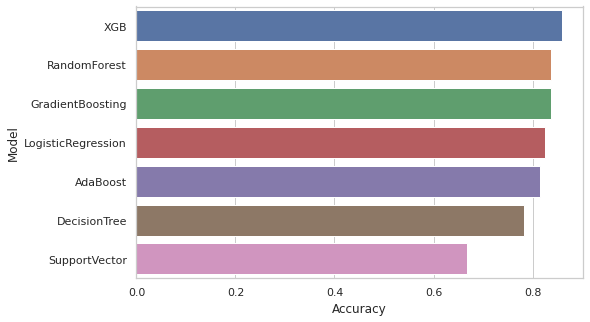

In [197]:
plt.figure(figsize=(8,5))
sns.barplot(x='Accuracy', y='Model', data=modelAccuracy)

>Without feature selection and standardization we can see that XBG gives the highest accuracy

#With Feature Selection and standardization

In [219]:
df_featureSelection= df_new.copy()

In [220]:
df_featureSelection.sample(2)

Age  Sex  ChestPainType  ...  Oldpeak  ST_Slope  HeartDisease
556   75    1              0  ...      2.0         0             0
395   38    1              0  ...      0.0         1             1

[2 rows x 12 columns]

In [234]:
X_train,X_test,y_train,y_test = train_test_split(df_featureSelection.drop("HeartDisease",axis=1),df_featureSelection['HeartDisease'],test_size=0.2)

In [235]:
X_train.shape,X_test.shape

((733, 11), (184, 11))

In [236]:
X_train.corr()

Age       Sex  ...   Oldpeak  ST_Slope
Age             1.000000  0.043733  ...  0.231341 -0.264561
Sex             0.043733  1.000000  ...  0.109355 -0.147197
ChestPainType  -0.072489 -0.136513  ... -0.176641  0.209463
RestingBP       0.249936 -0.024656  ...  0.152932 -0.053208
Cholesterol     0.044777 -0.108618  ...  0.069496 -0.085920
FastingBS       0.186546  0.133827  ...  0.075035 -0.183556
RestingECG     -0.010469  0.085134  ... -0.007882  0.004354
MaxHR          -0.381234 -0.197908  ... -0.148288  0.316020
ExerciseAngina  0.197242  0.176210  ...  0.398933 -0.417477
Oldpeak         0.231341  0.109355  ...  1.000000 -0.507567
ST_Slope       -0.264561 -0.147197  ... -0.507567  1.000000

[11 rows x 11 columns]

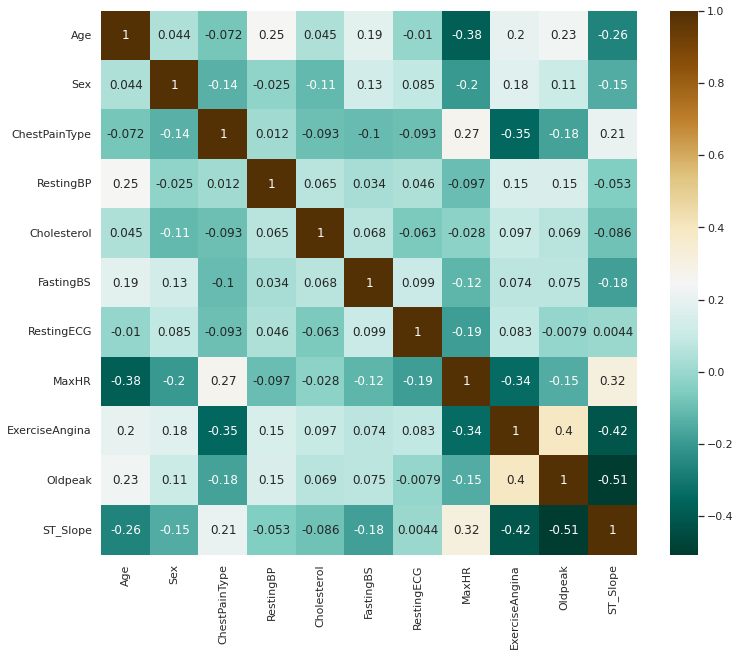

In [237]:
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.BrBG_r)
plt.show()

In [238]:
#with this function we can select highly correlated features
# it will remove the first feature that is correlated with other features

def correlation(dataset,threshold):
    col_corr = set() #set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [239]:
corr_features = correlation(X_train,0.5)

In [240]:
corr_features

{'ST_Slope'}

In [241]:
# Removing the corr features
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

Age  Sex  ChestPainType  ...  MaxHR  ExerciseAngina  Oldpeak
501   63    1              0  ...    138               1      2.0
788   68    0              2  ...    115               0      1.5
732   56    0              0  ...    133               1      4.0
701   62    1              1  ...    140               0      0.0
830   41    0              1  ...    172               0      1.4
..   ...  ...            ...  ...    ...             ...      ...
388   55    1              0  ...     83               0      0.0
122   46    1              0  ...    140               0      0.0
649   50    1              0  ...    126               1      0.9
591   58    1              0  ...    110               0      0.0
844   52    1              3  ...    190               0      0.0

[184 rows x 10 columns]

In [280]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


In [243]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [246]:
scaled_X_train

array([[ 0.37222269,  0.52208184, -0.79725461, ...,  1.22196452,
         1.02731069, -0.58855158],
       [-0.25668065, -1.91540852, -0.79725461, ...,  1.22196452,
         0.29041162, -0.58855158],
       [ 0.47703992,  0.52208184, -0.79725461, ..., -0.81835437,
        -0.7228246 ,  1.05804501],
       ...,
       [-0.15186343,  0.52208184, -0.79725461, ..., -0.81835437,
        -0.81493698,  1.05804501],
       [-1.72412179,  0.52208184, -0.79725461, ...,  1.22196452,
         0.56674877, -0.58855158],
       [-0.67594955,  0.52208184, -0.79725461, ..., -0.81835437,
         1.11942308,  1.05804501]])

>Logistic Regression

In [301]:
model_logisticScaled = LogisticRegression()
grid_logistic = {"C":[0.1,1,10,100,1000]}


In [302]:
gridSearch_logistic = GridSearchCV(model_logisticScaled,grid_logistic,cv=5)

In [303]:
gridSearch_logistic.fit(scaled_X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100, 1000]})

In [304]:
predLogisticScaled = gridSearch_logistic.predict(scaled_X_test)

In [305]:
confusion_matrix(y_test,predLogisticScaled)

array([[71, 20],
       [ 9, 84]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



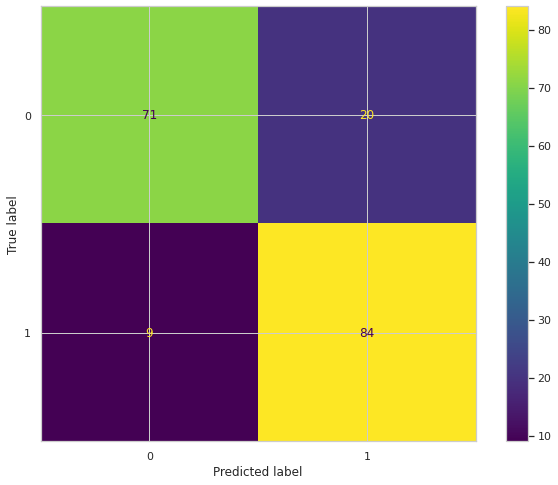

In [316]:
plot_confusion_matrix(gridSearch_logistic,scaled_X_test,y_test)

In [306]:
accuracyLogisticScaled = accuracy_score(y_test,predLogisticScaled)
accuracyLogisticScaled

0.842391304347826

In [307]:
gridSearch_logistic.best_params_

{'C': 0.1}

>Decision Tree Classifier

In [308]:
model_decisionScaled = DecisionTreeClassifier(criterion='entropy')
grid_decision = {"max_depth" : [1,2,3,4,5,6,7,8,9]}


In [309]:
gridSearch_decision = GridSearchCV(model_decisionScaled,grid_decision,cv=5)

In [310]:
gridSearch_decision.fit(scaled_X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [311]:
predDecisionScaled = gridSearch_decision.predict(scaled_X_test)

In [312]:
confusion_matrix(y_test,predDecisionScaled)


array([[73, 18],
       [14, 79]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



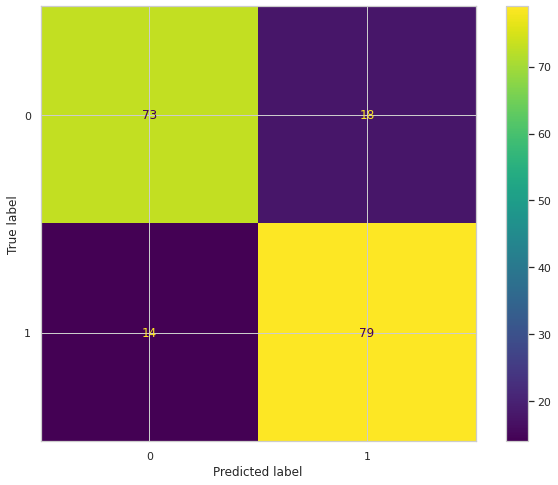

In [313]:
plot_confusion_matrix(gridSearch_decision,scaled_X_test,y_test)

In [314]:
accuracyDecisionScaled = accuracy_score(y_test,predDecisionScaled)
accuracyDecisionScaled

0.8260869565217391

In [315]:
# depth of the tree
gridSearch_decision.best_params_

{'max_depth': 3}

>Random Forest

In [278]:
model_randomScaled = RandomForestClassifier(criterion='entropy')
#To optimize information gain
grid_forest = {"n_estimators" : [1000,2000,3000,4000,5000]}
gridSearch_forest = GridSearchCV(model_randomScaled,grid_forest,cv = 5)

In [279]:
gridSearch_forest.fit(scaled_X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(criterion='entropy'),
             param_grid={'n_estimators': [1000, 2000, 3000, 4000, 5000]})

In [282]:
predRandomScaled = gridSearch_forest.predict(scaled_X_test)

In [283]:
confusion_matrix(y_test,predRandomScaled)


array([[75, 16],
       [ 4, 89]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



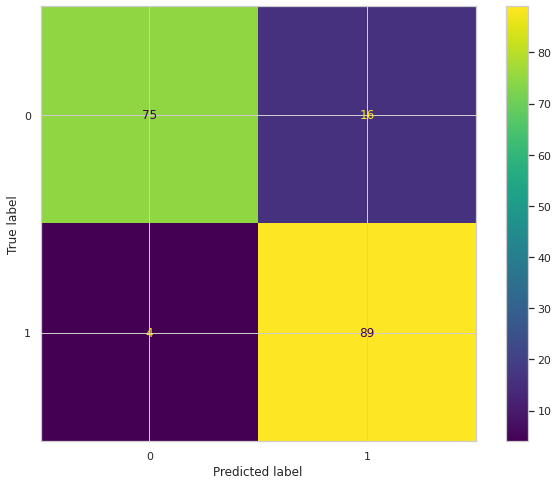

In [284]:
plot_confusion_matrix(gridSearch_forest,scaled_X_test,y_test)

In [285]:
accuracyRandomScaled = accuracy_score(y_test,predRandomScaled)
accuracyRandomScaled

0.8913043478260869

In [281]:
gridSearch_forest.best_params_

{'n_estimators': 5000}

>Ada Boost Classifier

In [286]:
model_adaboostScaled = AdaBoostClassifier(n_estimators=100)
model_adaboostScaled.fit(scaled_X_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [287]:
predAdaBoostScaled = model_adaboostScaled.predict(scaled_X_test)

In [288]:
confusion_matrix(y_test,predAdaBoostScaled)

array([[77, 14],
       [ 7, 86]])

In [289]:
accuracyAdaBoostScaled = accuracy_score(y_test,predAdaBoostScaled)
accuracyAdaBoostScaled

0.8858695652173914

>Gradient Boosting Classifier

In [290]:
model_gradientScaled = GradientBoostingClassifier(max_depth=5)
model_gradientScaled.fit(scaled_X_train,y_train)

GradientBoostingClassifier(max_depth=5)

In [291]:
predGradientScaled = model_gradientScaled.predict(scaled_X_test)

In [293]:
confusion_matrix(y_test,predGradientScaled)

array([[73, 18],
       [ 5, 88]])

In [294]:
accuracyGradientScaled = accuracy_score(y_test,predGradientScaled)
accuracyGradient

0.8369565217391305

>Support vector classifier

In [295]:
model_SVM = SVC(kernel="rbf")
grid_svc = {"gamma":[0.001,0.01,0.1,1,10],"C":[0.1,1,10,100,1000]}
gridSearch_svc = GridSearchCV(model_SVM,grid_svc,cv = 5)

In [296]:
gridSearch_svc.fit(scaled_X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1, 10]})

In [297]:
predSVCScaled = gridSearch_svc.predict(scaled_X_test)

In [298]:
confusion_matrix(y_test,predSVCScaled)


array([[71, 20],
       [ 5, 88]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



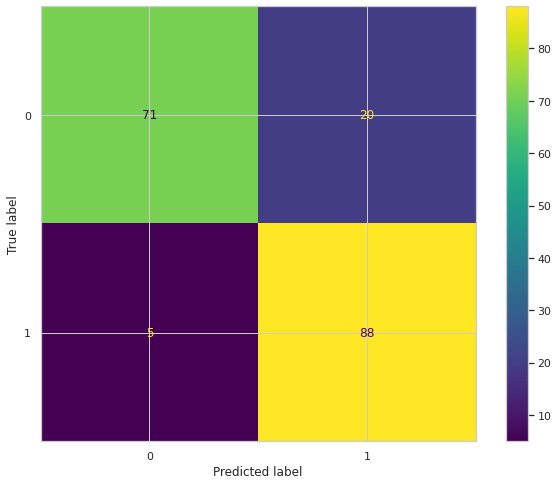

In [299]:
plot_confusion_matrix(gridSearch_svc,scaled_X_test,y_test)

In [300]:
accuracySVCScaled = accuracy_score(y_test,predSVCScaled)
accuracySVCScaled

0.8641304347826086

>XGB classifier

In [317]:
model_XGBScaled = XGBClassifier(use_label_encoder=False,n_estimators=2000)

In [318]:
model_XGBScaled.fit(scaled_X_train,y_train)

XGBClassifier(n_estimators=2000, use_label_encoder=False)

In [319]:
predXGBScaled = model_XGBScaled.predict(scaled_X_test)

In [321]:
confusion_matrix(y_test,predXGBScaled)

array([[73, 18],
       [ 8, 85]])

In [322]:
accuracyXGBScaled = accuracy_score(y_test,predXGBScaled)
accuracyXGBScaled

0.8586956521739131

**Accuracy comparision of all the models used above**

In [323]:
accuracy_scaled = [accuracyLogisticScaled,accuracyDecisionScaled,accuracyRandomScaled,accuracyAdaBoostScaled,accuracyGradientScaled,accuracySVCScaled,accuracyXGBScaled]
model_scaled = ['LogisticRegression','DecisionTree','RandomForest','AdaBoost','GradientBoosting','SupportVector','XGB']

In [324]:
modelAccuracyScaled = pd.DataFrame(data={'Model':model_scaled,'Accuracy':accuracy_scaled})

In [327]:
modelAccuracyScaled.sort_values(by=['Accuracy'],ascending=False,inplace=True)

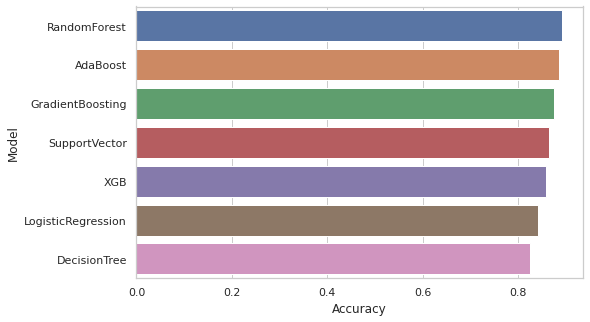

In [328]:
plt.figure(figsize=(8,5))
sns.barplot(x='Accuracy', y='Model', data=modelAccuracyScaled)

>With feature selection and standardization we can see that Random Forest gives the highest accuracy